In [0]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline

In [0]:
# Found at https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
class Arrow3D(FancyArrowPatch):
  def __init__(self, xs, ys, zs, *args, **kwargs):
    FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
    self._verts3d = xs, ys, zs

  def draw(self, renderer):
    xs3d, ys3d, zs3d = self._verts3d
    xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
    self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
    FancyArrowPatch.draw(self, renderer)

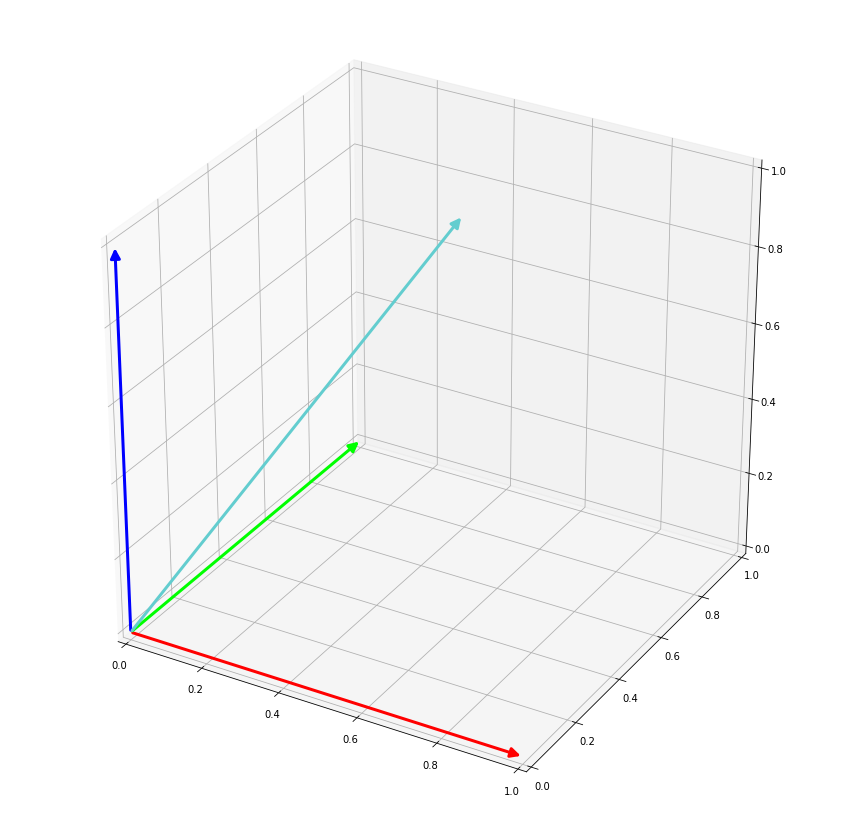

In [44]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
rgb = npr.rand(3) #[0.5, 0.25, 0.7]
red = Arrow3D([0, 1.0], [0, 0], [0, 0], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color=[1.0, 0.0, 0.0])
ax.add_artist(red)
green = Arrow3D([0, 0], [0, 1.0], [0, 0], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color=[0.0, 1.0, 0.0])
ax.add_artist(green)
blue = Arrow3D([0, 0], [0, 0], [0, 1.0], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color=[0.0, 0.0, 1.0])
ax.add_artist(blue)
rand_color = Arrow3D([0, rgb[0]], [0, rgb[1]], [0, rgb[2]], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color=rgb)
ax.add_artist(rand_color)